In [2]:
import pandas as pd
import numpy as np

In [3]:
## Load the data
data = pd.read_csv('Building_Permits.csv')

## Clean the data 
selected_columns = ['Permit Type', 'Current Status', 'Filed Date', 'Issued Date', 'Structural Notification', 'Number of Existing Stories', 'Number of Proposed Stories', 'Existing Construction Type', 'Proposed Construction Type', 'Supervisor District', 'Site Permit']
df = data[selected_columns]

df['Structural Notification'] = df['Structural Notification'].fillna(0)
df['Structural Notification'] = df['Structural Notification'].replace('Y', 1)
# notification given = 1, no = 0

df['Site Permit'] = df['Site Permit'].fillna(0)
df['Site Permit'] = df['Site Permit'].replace('Y', 1)
# Permit for site yes = 1, no = 0

mapping = {'withdrawn': 0, 'suspend': 1, 'reinstated': 2, 'issued': 3, 'filed':4, 'complete':5, 'approved':6, 'appeal':7}
df['Current Status'] = df['Current Status'].map(mapping)

df = df.dropna()

df['Issued Date'] = pd.to_datetime(df['Issued Date'])
df['Filed Date']  = pd.to_datetime(df['Filed Date'])

## calculate the days difference between filed and issued
datediff = (df['Issued Date'] - df['Filed Date']).dt.days
df['Date Difference'] = datediff

# drop the 0 in datediff
df = df[df['Date Difference'] > 0]

## Remove extreme values
z_scores = (df['Date Difference'] - df['Date Difference'].mean()) / df['Date Difference'].std()
threshold = 3
df_without_outliers = df[(z_scores < threshold) & (z_scores > -threshold)]


C:\Windows\Temp\ipykernel_25256\3480904050.py:2: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Building_Permits.csv')
C:\Windows\Temp\ipykernel_25256\3480904050.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Structural Notification'] = df['Structural Notification'].fillna(0)
C:\Windows\Temp\ipykernel_25256\3480904050.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Structural Notification'] = df['Structural Notification'].re

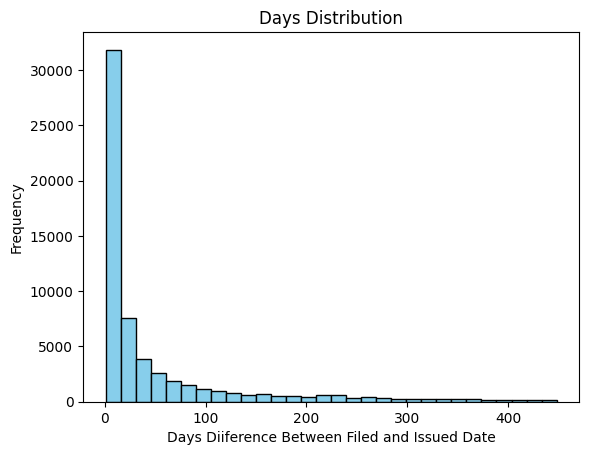

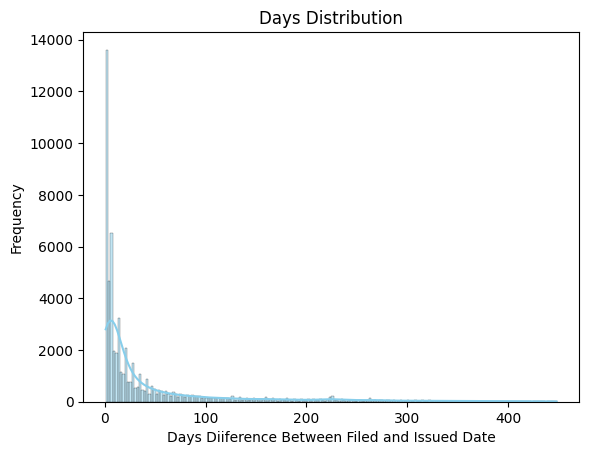

In [4]:
## data visualization
import matplotlib.pyplot as plt

plt.hist(df_without_outliers['Date Difference'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Days Diiference Between Filed and Issued Date')
plt.ylabel('Frequency')
plt.title('Days Distribution')
plt.show()

import seaborn as sns
sns.histplot(df_without_outliers['Date Difference'], kde=True, color='skyblue')
plt.xlabel('Days Diiference Between Filed and Issued Date')
plt.ylabel('Frequency')
plt.title('Days Distribution')
plt.show()

In [5]:
## Basic summary statistics
statistics = df_without_outliers['Date Difference'].describe()
print(statistics)

count    59247.000000
mean        49.536280
std         82.413595
min          1.000000
25%          4.000000
50%         13.000000
75%         50.000000
max        448.000000
Name: Date Difference, dtype: float64


In [6]:
## Split the data into test and training sample
from sklearn.model_selection import train_test_split

X = df_without_outliers.drop(['Date Difference', 'Filed Date', 'Issued Date'], axis = 1)
y = df_without_outliers['Date Difference']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
## Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=66)
rf_classifier.fit(X_train, y_train)
y_pred_random = rf_classifier.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
print("Accuracy Score (Random forest):", accuracy_random)

Accuracy Score (Random forest): 0.13966244725738397


In [8]:
## Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import svm

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.14151898734177215


In [9]:
## Gradient descent boosting example
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=1000, random_state=0, learning_rate=0.01)

model.fit(X_train, y_train)  
y_pred = model.predict(X_test)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 59.73181668679151
